**1.	Histogram matching/specification**

In [25]:
#importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [26]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


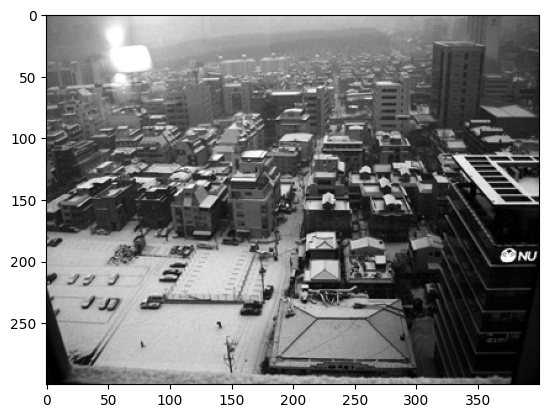

In [29]:
#reading the input image
input_img = cv2.imread('/content/drive/MyDrive/DIP/assignment 2/prob1(a).jpg',  cv2.IMREAD_GRAYSCALE)
plt.imshow(input_img, 'gray')

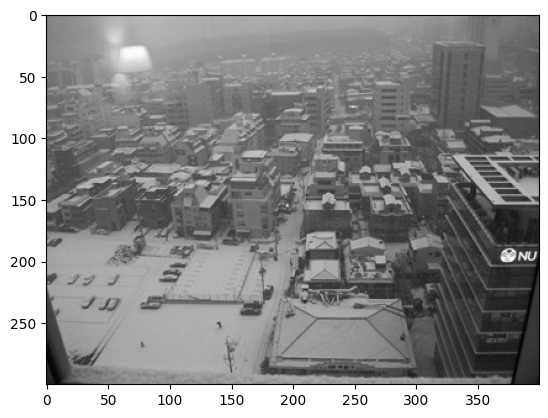

In [30]:
#reading the reference image
reference_img = cv2.imread('/content/drive/MyDrive/DIP/assignment 2/prob1(b).jpg',  cv2.IMREAD_GRAYSCALE)
plt.imshow(reference_img, 'gray')

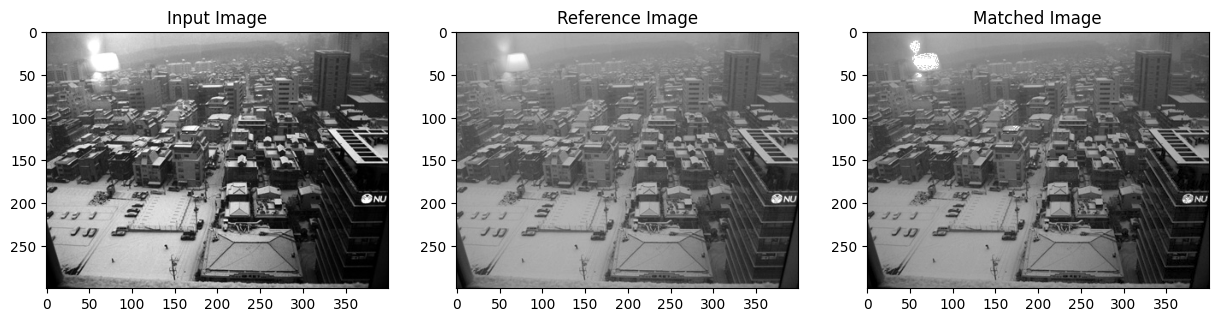

In [31]:
#Calculating the histograms for input and reference images
input_histogram, _ = np.histogram(input_img.ravel(), bins=256, range=(0, 255))
reference_histogram, _ = np.histogram(reference_img.ravel(), bins=256, range=(0, 255))

#Calculating cumulative distribution functions
input_cdf = input_histogram.cumsum()
normalized_input_cdf = input_cdf / input_cdf.max()

reference_cdf = reference_histogram.cumsum()
normalized_reference_cdf = reference_cdf / reference_cdf.max()

#Calculating the mapping function from input to reference CDFs where range is 256
mapping_func = np.interp(normalized_input_cdf, normalized_reference_cdf, range(256))

#Applying the mapping function to the input image
matched_img = mapping_func[input_img]
matched_histogram, _ = np.histogram (matched_img.ravel(), bins=256, range=(0,255))

#Displaying the input image, reference image, and matched image
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axis[0].imshow(input_img, cmap='gray')
axis[0].set_title('Input Image')
axis[1].imshow(reference_img, cmap='gray')
axis[1].set_title('Reference Image')
axis[2].imshow(matched_img, cmap='gray')
axis[2].set_title('Matched Image')
plt.show()


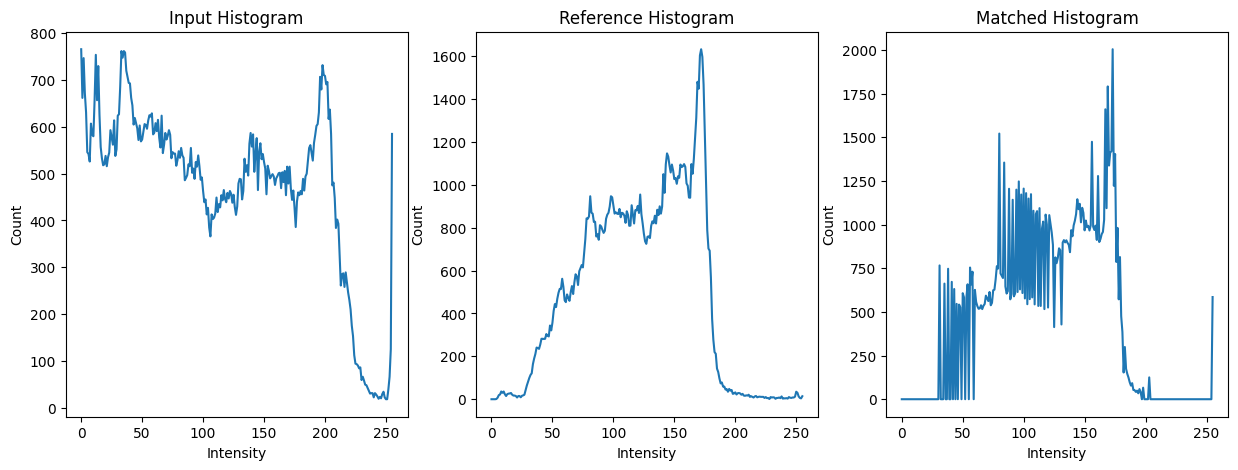

In [34]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axis[0].plot(input_histogram)
axis[0].set_title('Input Histogram')
axis[0].set_xlabel('Intensity')
axis[0].set_ylabel('Count')
axis[1].plot(reference_histogram)
axis[1].set_title('Reference Histogram')
axis[1].set_xlabel('Intensity')
axis[1].set_ylabel('Count')
axis[2].plot(matched_histogram)
axis[2].set_title('Matched Histogram')
axis[2].set_xlabel('Intensity')
axis[2].set_ylabel('Count')
plt.show()

We can see the matched histogram output and the reference output, they are very similar both not exactly same. When global histogram matching is applied on an image, the internsity districution of the image adjusts to match the  target distribution. The process is to calculate the cumulative distribution function (CDF) of both the input image and the reference histogram. Inverse of hte CDF of the reference histogram is applied to the CDF of the input image to obtain a new CDF. The new CDF is mapped to the intensity values of the input image to obtain the histogram matched image.


From the obtained histogram, line plots, we can infer that the intensity values in the input histogram where more towards 0-100 where as the reference histogram had intensity values more towards 100-200. The matched histogram is similar to the refernce histogram but it is not exactly the same. 